In [90]:
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi
from qiskit import Aer
import pandas as pd
import numpy as np
import math

In [92]:
a=7
N=15
def _7mod15():
        
    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)
        
        for j in range(i - 1, -1, -1): 
            qft_circ.cp(pi/(2 ** (i - j)), j, i)
    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

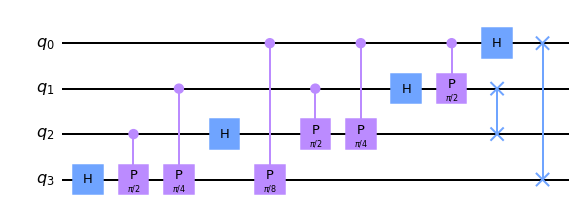

In [49]:
n=4
qft_circ = QuantumCircuit(n)
for i in range(n-1, -1, -1):
    qft_circ.h(i)
        
    for j in range(i - 1, -1, -1): 
        qft_circ.cp(pi/(2 ** (i - j)), j, i)
 
for i in range(n // 2):
    qft_circ.swap(i, n - i - 1)
qft_circ.draw(output="mpl")
#qft_circ.draw()

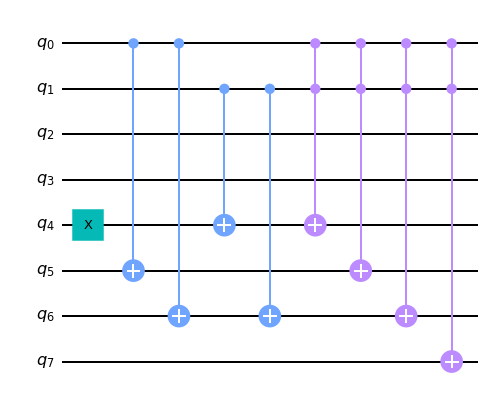

In [23]:
circ=_7mod15()
#cbits=ClassicalRegister(4)
#
#circ.append(circ,cbits)
circ.measure_all
#circ.measure(range(4),range(4))
circ.draw(output="mpl")

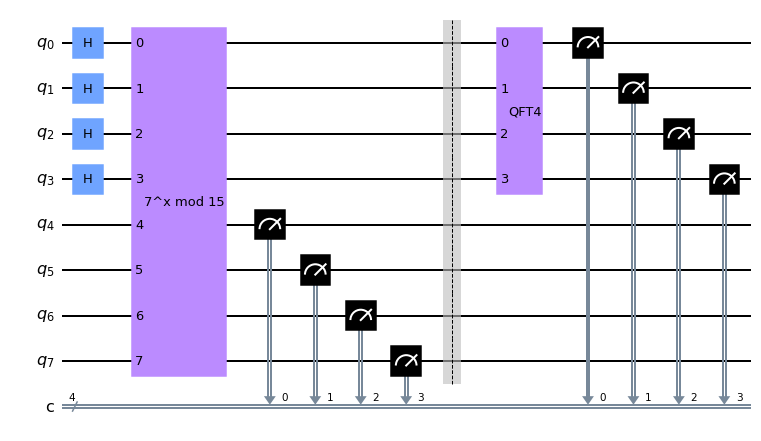

In [54]:

circ = QuantumCircuit(8,4)
circ.h(range(4))
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.barrier(range(8))
circ.append(QFT(4), range(4))
circ.measure(range(4), range(4))
circ.draw(output = 'mpl')

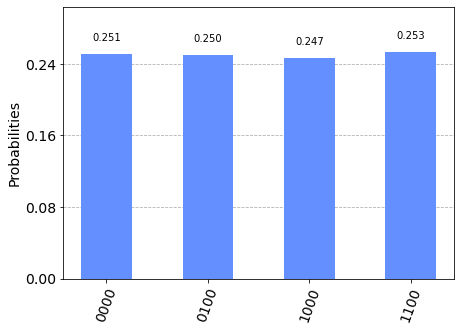

In [55]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 100000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [95]:
n_count=8
rows, measured_phases = [], []
decimal_results=[]
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    decimal_results=np.append(decimal_results,decimal)
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)
r=int(decimal_results[0])
for i in range(1,len(decimal_results)):
    r=math.gcd(r,int(decimal_results[i]))
r=int(16/r)
print(r)
guesses = [math.gcd(a**(r//2)-1, N), math.gcd(a**(r//2)+1, N)]
print(guesses)

        Register Output          Phase
0  0000(bin) =   0(dec)   0/256 = 0.00
1  0100(bin) =   4(dec)   4/256 = 0.02
2  1000(bin) =   8(dec)   8/256 = 0.03
3  1100(bin) =  12(dec)  12/256 = 0.05
4
[3, 5]


8
